In [ ]:
# Improving matches from a dating site with kNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from random import random
import csv

In [2]:
# Tạo mảng numpy X_train, Y_train và X_test Y_test chọn
# ngẫu nhiên từ file datingTestSet.txt 
# X_train, y_train = dataset_to_numpy_util(load_dataset(training_filenames), len(training_filenames))
# X_test, y_test = dataset_to_numpy_util(load_dataset(testing_filenames), len(testing_filenames))

NameError: name 'dataset_to_numpy_util' is not defined

In [4]:
# Number of frequent flyer miles earned per year
#  Percentage of time spent playing video games
# Liters of ice cream consumed per week
# data_read=pd.read_csv('datingTestSet.txt', delimiter ='\t')
# data_read.head()
df=pd.read_csv('datingTestSet.txt', delimiter ='\t' )
df

,fly,videos game,ice cream,like
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [5]:
# x=data_read[['', '8.326976', '0.953952']]
# y=data_read.largeDoses
x=df.drop(columns=['like'])
y=df.like

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)
print(x_train)
print("-------------------------")
print(x_test)

       fly  videos game  ice cream
352  16633     6.956372   1.519308
410   4135     1.825927   1.128347
802  35695    10.304798   1.576488
238   8998     4.156252   0.097109
27   28567     9.968648   0.731232
..     ...          ...        ...
485  33085    14.164141   0.560970
172  32011    13.087566   0.476002
559  50011     1.229094   1.638690
37    5914     2.216246   0.587095
918  12761     7.798138   0.147917

[700 rows x 3 columns]
-------------------------
       fly  videos game  ice cream
539   4249     5.332865   0.109288
649  43075    10.086796   0.570455
25   36788    12.458258   0.649617
225  70036    13.364030   0.549972
958  35018     9.959588   0.060020
..     ...          ...        ...
902  55783     3.612548   1.551911
105   1774     4.682812   0.578112
316  49459     8.369667   0.656697
424  30417     7.185807   1.489102
341  35394     1.157764   1.603217

[300 rows x 3 columns]


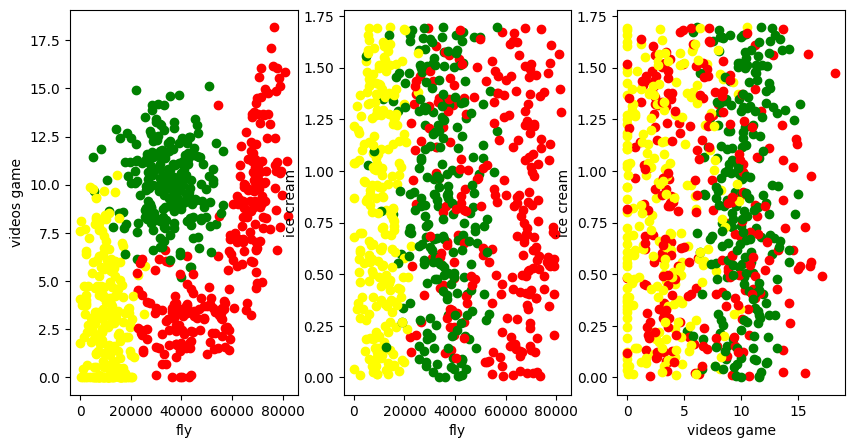

In [9]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(10,5), dpi=100)
for i in x_train.index:
    if y_train[i] =='largeDoses':
        color ='green'
    elif y_train[i] == 'smallDoses':
        color='yellow'
    else:
        color='red'
    
    axes[0].scatter(x_train['fly'][i], x_train['videos game'][i], color=color,)
    axes[1].scatter(x_train['fly'][i], x_train['ice cream'][i], color=color)
    axes[2].scatter(x_train['videos game'][i], x_train['ice cream'][i], color=color)

axes[0].set_xlabel('fly')
axes[0].set_ylabel('videos game')
axes[1].set_xlabel('fly')
axes[1].set_ylabel('ice cream')
axes[2].set_xlabel('videos game')
axes[2].set_ylabel('ice cream')
plt.show()

In [8]:
# Train và đánh giá độ chính xác trên tập test
knn5=neighbors.KNeighborsClassifier(n_neighbors=18)
knn5.fit(x_train, y_train)
y_pred=knn5.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(str(np.round(metrics.accuracy_score(y_test, y_pred),4)))

[[ 60  32   0]
 [ 19  78   8]
 [  0   3 100]]
0.7933


In [18]:
k_grid=np.arange(1,999,1)
parameters={'n_neighbors': k_grid}

In [19]:
# Tìm k tốt nhất sử dụng
# GridSearchCV
gridCV=GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs=-1)
gridCV.fit(x_train, y_train)
best_k=gridCV.best_params_['n_neighbors']
print("best k: "+ str(best_k))

best k: 86


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.80571429 0.74571429 0.82       0.79       0.81428571 0.79428571
 0.81714286 0.81       0.80571429 0.80142857 0.82       0.80428571
 0.82285714 0.81285714 0.81714286 0.81428571 0.81142857 0.81428571
 0.81142857 0.81142857 0.81857143 0.80571429 0.80571429 0.80571429
 0.80714286 0.80285714 0.80571429 0.80714286 0.81142857 0.80285714
 0.81571429 0.80857143 0.82       0.80857143 0.82       0.81857143
 0.81571429 0.81857143 0.81428571 0.81714286 0.81428571 0.82142857
 0.81428571 0.81714286 0.81714286 0.82       0.82       0.82
 0.81714286 0.82285714 0.81857143 0.82       0.81714286 0.82
 0.82142857 0.82285714 0.82142857 0.82142857 0.82142857 0.82142857
 0.82       0.82142857 0.82142857 0.82142857 0.82142857 0.82
 0.82142857 0.82142857 0.82       0.82142857 0.82       0.82
 0.82142857 0.82       0.82       0.82       0.821

In [20]:
# Test lại với k tốt nhất
knn5=neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn5.fit(x_train, y_train)
y_pred=knn5.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(str(np.round(metrics.accuracy_score(y_test, y_pred),4)))

[[ 53  39   0]
 [  6  91   8]
 [  0   2 101]]
0.8167
